### Q1. What is Gradient Boosting Regression?
Gradient Boosting Regression is an ensemble learning technique that builds a strong predictive model by combining multiple weak learners, typically decision trees. The algorithm sequentially fits new models to correct the residual errors of the previous models, minimizing a specified loss function using gradient descent.

---

### Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.


Mean Squared Error: 0.0026736574448621487
R-Squared: 0.9947287603493568


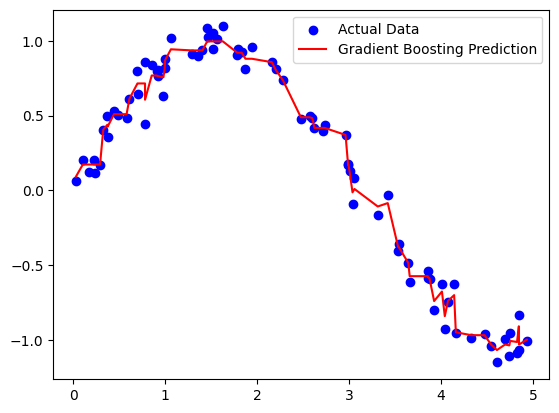

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate a simple dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Gradient Boosting implementation
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.f0 = None
    
    def fit(self, X, y):
        self.f0 = np.mean(y)
        residuals = y - self.f0
        
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions
            self.models.append(tree)
    
    def predict(self, X):
        y_pred = np.full(X.shape[0], self.f0)
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

# Train the model
model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Plot the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Gradient Boosting Prediction')
plt.legend()
plt.show()

---

### Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimize the performance of the model. Use grid search or random search to find the best hyperparameters.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor as SklearnGBR

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(SklearnGBR(), param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best R-Squared Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
Best R-Squared Score: 0.040840387236280626


---

### Q4. What is a weak learner in Gradient Boosting?
A weak learner in Gradient Boosting is a simple predictive model that performs slightly better than random guessing. Typically, decision trees with a limited depth (also known as shallow trees or stumps) are used as weak learners.

---

### Q5. What is the intuition behind the Gradient Boosting algorithm?
Gradient Boosting builds an ensemble of models sequentially, where each new model corrects the errors made by the previous ones. The algorithm minimizes the loss function by taking small steps in the negative gradient direction, ensuring better predictions at each stage.

---

### Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?
1. It starts with an initial prediction, typically the mean of the target variable.
2. It calculates the residual errors from this initial prediction.
3. It fits a weak learner (e.g., a small decision tree) to these residual errors.
4. The predictions of the weak learner are scaled using a learning rate and subtracted from the residuals.
5. Steps 2-4 are repeated for a fixed number of iterations or until convergence.
6. The final prediction is obtained by summing the predictions of all weak learners.

---

### Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?
1. **Define the loss function**: The algorithm minimizes a loss function, such as mean squared error for regression.
2. **Compute the initial model**: The first model is a simple predictor (e.g., the mean of the target variable).
3. **Calculate residuals**: Compute the difference between the actual values and the predicted values.
4. **Fit weak learners**: Train weak learners on the residuals to approximate the gradient of the loss function.
5. **Update the model**: Adjust the predictions by adding the scaled weak learner predictions.
6. **Iterate**: Repeat steps 3-5 for a specified number of iterations.
7. **Final prediction**: Sum the contributions from all weak learners to get the final model output.
